<a href="https://colab.research.google.com/github/dorissuzukiesmerio/Data_viz_python/blob/main/Animation_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load modules:

In [6]:
import matplotlib.pyplot as plt
import matplotlib.animation
import seaborn as sns
import numpy as np

Generate random data:

In [7]:
def get_data(i=0):
  x,y = np.random.normal(loc=i, scale=3, size=(2,260))
  return x,y


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1595: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


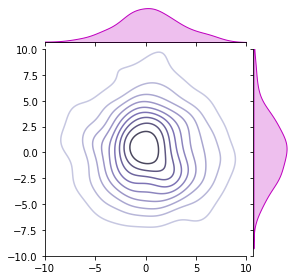

In [11]:
# Get  the data: 
x,y = get_data()
g = sns.JointGrid(x=x, y=y, size=4)
lim = (-10,10)

# Define x and y axis
def prep_axes(g, xlim, ylim):
    g.ax_joint.clear()
    g.ax_joint.set_xlim(xlim)
    g.ax_joint.set_ylim(ylim)
    g.ax_marg_x.clear()
    g.ax_marg_x.set_xlim(xlim)
    g.ax_marg_y.clear()
    g.ax_marg_y.set_ylim(ylim)
    plt.setp(g.ax_marg_x.get_xticklabels(), visible=False)
    plt.setp(g.ax_marg_y.get_yticklabels(), visible=False)
    plt.setp(g.ax_marg_x.yaxis.get_majorticklines(), visible=False)
    plt.setp(g.ax_marg_x.yaxis.get_minorticklines(), visible=False)
    plt.setp(g.ax_marg_y.xaxis.get_majorticklines(), visible=False)
    plt.setp(g.ax_marg_y.xaxis.get_minorticklines(), visible=False)
    plt.setp(g.ax_marg_x.get_yticklabels(), visible=False)
    plt.setp(g.ax_marg_y.get_xticklabels(), visible=False)

# animation
def animate(i):
    g.x, g.y = get_data(i)
    prep_axes(g, lim, lim)
    g.plot_joint(sns.kdeplot, cmap="Purples_d")
    g.plot_marginals(sns.kdeplot, color="m", shade=True)

frames=np.sin(np.linspace(0,2*np.pi,17))*5
ani = matplotlib.animation.FuncAnimation(g.fig, animate, frames=frames, repeat=True)